<a href="https://colab.research.google.com/github/Pritamart/Image-processing/blob/main/image_processing6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dear Students,

Please find the list of tasks for today:

1.WAFP to create a histogram of a given image.

2.WAFP to perform image segmentation using k-means clustering. You can use the sklearn library to perform the clustering.

3.WAFP to perform image segmentation using Otsu's method.

4.WAFP to create a negative image of a given image. You can use only the PIL library to open and manipulate the image.

5.WAFP to apply a negative filter to a given image using NumPy.

6.WAFP to apply a negative filter to a given image using OpenCV. You can use the cv2 library to load and display the images.

7.WAFP to adjust the brightness of an image. You can use the PIL library to open and manipulate the image.

8.WAFP to adjust the contrast of an image. You can use the PIL library to open and manipulate the image.

9.WAFP to adjust the brightness and contrast of an image. You can use the PIL library to open and manipulate the image.

10. WAFP to perform histogram equalization on a grayscale image.

11. WAFP to perform histogram equalization on a colour image.


Project Idea: Automating Image Processing using Python
Develop a Python application that allows the user to load an image and manipulate it keeping the following requirements in mind:

Requirements
The program should allow the user to select an image file from their computer and display it in a GUI window.
The program should provide various options for image manipulation, such as:
Adjusting brightness and contrast
Applying image filters (e.g., blur, sharpen, edge detection)
Cropping and resizing the image
Converting the image to grayscale or a different color space
Performing histogram equalization
Applying other image processing techniques of your choice
The program should display the manipulated image in the GUI window as the user makes changes.
The program should allow the user to save the manipulated image to their computer as a new file.

Tips
You can use libraries such as PIL or opencv-python to load and manipulate the image.
You can use a GUI library such as tkinter or PyQt to create the interface.
Start by implementing each image processing technique one at a time and testing it thoroughly before moving on to the next.
Make sure to handle errors gracefully, such as when the user selects an invalid file or saves the image to an invalid location.

Possible Extensions
Add support for multiple image files, allowing the user to work on several images at once.
Add a "preview" mode that allows the user to see the original and manipulated images side by side.
Add support for undo/redo functionality, allowing the user to revert changes they've made.
Add support for batch processing, allowing the user to apply the same image processing technique to multiple images at once.

Best wishes

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image, ImageOps
from google.colab.patches import cv2_imshow

# **1.WAFP to create a histogram of a given image.**

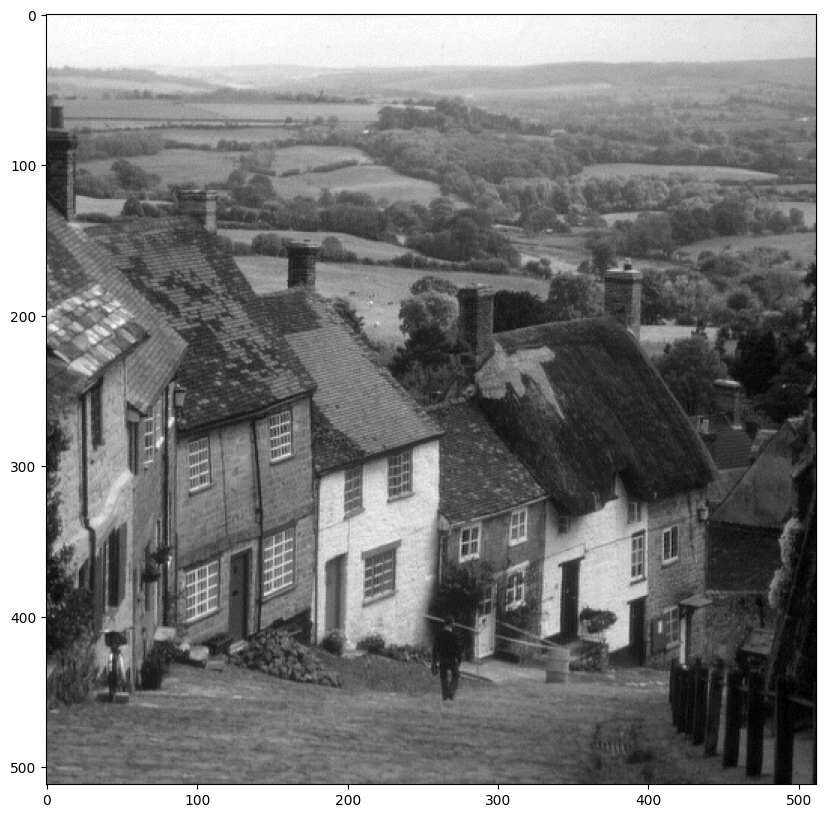

In [ ]:
goldhill = cv2.imread("goldhill.bmp",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill,cmap="gray")
plt.show()

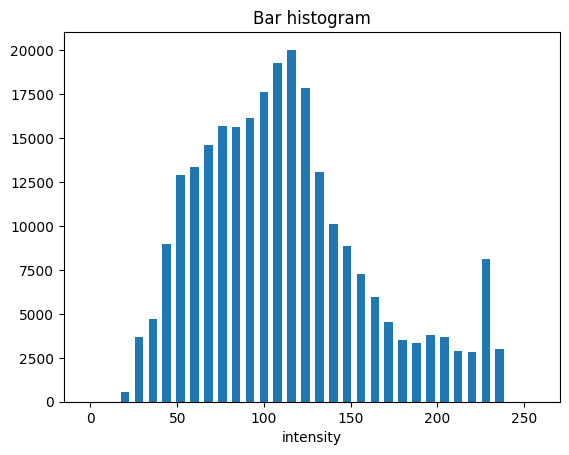

In [ ]:
def plot_hist(image):
    intensity_values=np.array([x for x in range(256)])
    plt.bar(intensity_values, cv2.calcHist([image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.xlabel('intensity')
    plt.title("Bar histogram")
    plt.show()
plot_hist(goldhill)

# **2.WAFP to perform image segmentation using k-means clustering. You can use the sklearn library to perform the clustering.**

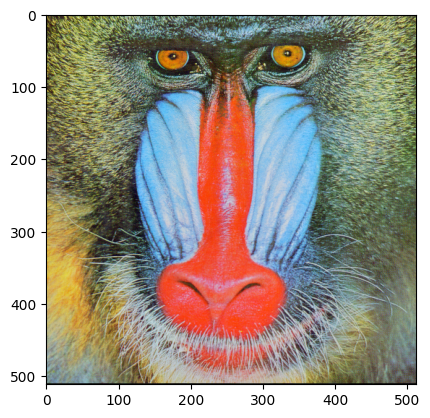

In [ ]:
image = cv2.imread("/content/baboon.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

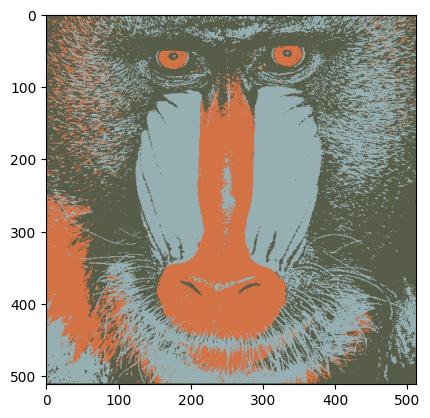

In [ ]:
def kmeans (image):
    pixel_vals = image.reshape((-1,3))
    pixel_vals = np.float32(pixel_vals)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    k = 3
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    segmented_image = segmented_data.reshape((image.shape))
    plt.imshow(segmented_image)
kmeans (image)



# **3.WAFP to perform image segmentation using Otsu's method.**

In [ ]:
image1 = cv2.imread('/content/baboon.png')
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)		


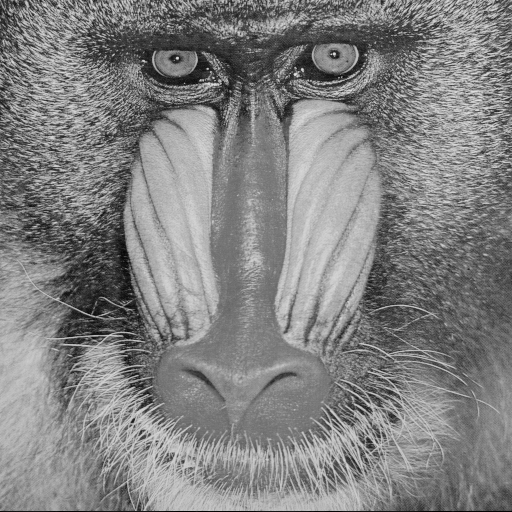

In [ ]:
def Otsu (img):
    ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY +cv2.THRESH_OTSU)	
    window_name = "Image"
    cv2_imshow(img)		
    if cv2.waitKey(0) & 0xff == 27:
	    cv2.destroyAllWindows()	
Otsu (img)

# **4.WAFP to create a negative image of a given image. You can use only the PIL library to open and manipulate the image.**

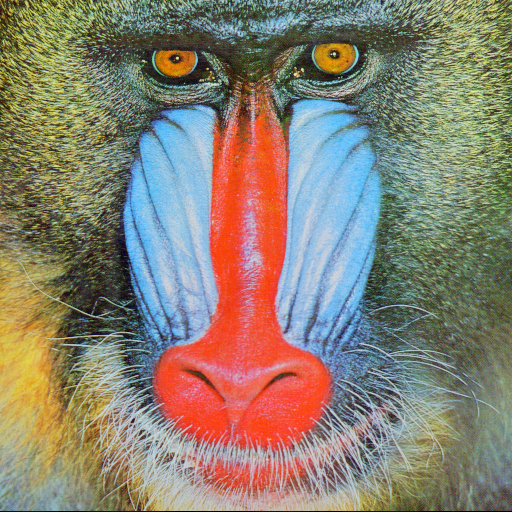

In [ ]:
from PIL import ImageFilter
from PIL import Image
img = Image.open("/content/baboon.png");
img.show()

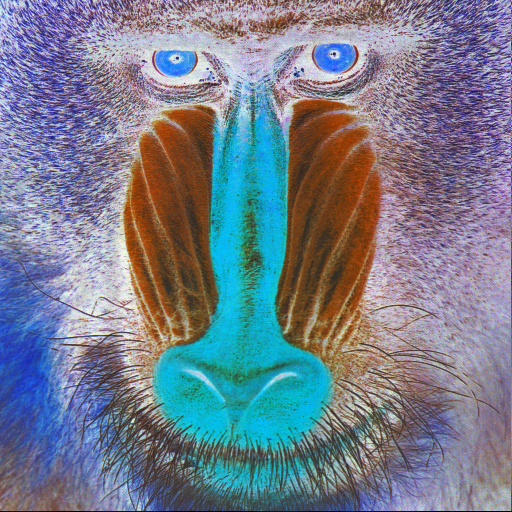

In [ ]:
def negative (img):
    for i in range(0, img.size[0]-1):
        for j in range(0, img.size[1]-1):
            pixelColorVals = img.getpixel((i,j));
            redPixel    = 255 - pixelColorVals[0];
            greenPixel  = 255 - pixelColorVals[1]; 
            bluePixel   = 255 - pixelColorVals[2]
            img.putpixel((i,j),(redPixel, greenPixel, bluePixel));
    img.show();
negative (img)

# 5.WAFP to apply a negative filter to a given image using NumPy.

Text(0.5, 1.0, 'Negative of RGB image')

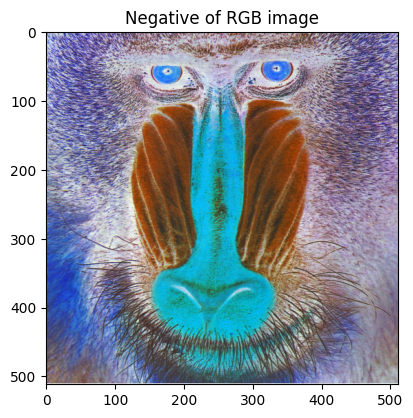

In [ ]:
img = np.array(Image.open("/content/baboon.png"))
fig = plt.figure(figsize=(10, 10))
img = 255 - img
fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title('Negative of RGB image')

# 6.WAFP to apply a negative filter to a given image using OpenCV. You can use the cv2 library to load and display the images.

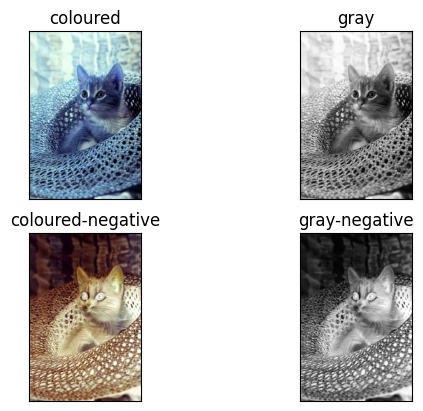

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/cat.png")
gray = cv2.imread("/content/cat.png", 0)

def  negative_filter (img, gray):

    colored_negative = abs(255-img)
    gray_negative = abs(255-gray)

    imgs = [img, gray, colored_negative, gray_negative]
    title = ['coloured', 'gray', 'coloured-negative', 'gray-negative']


    plt.subplot(2, 2, 1)
    plt.title(title[0])
    plt.imshow(imgs[0])
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 2, 2)
    plt.title(title[1])
    plt.imshow(imgs[1], cmap='gray')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 2, 3)
    plt.title(title[2])
    plt.imshow(imgs[2])
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 2, 4)
    plt.title(title[3])
    plt.imshow(imgs[3], cmap='gray')
    plt.xticks([])
    plt.yticks([])

    plt.show()
negative_filter (img, gray)

## **7.WAFP to adjust the brightness of an image. You can use the PIL library to open and manipulate the image.**

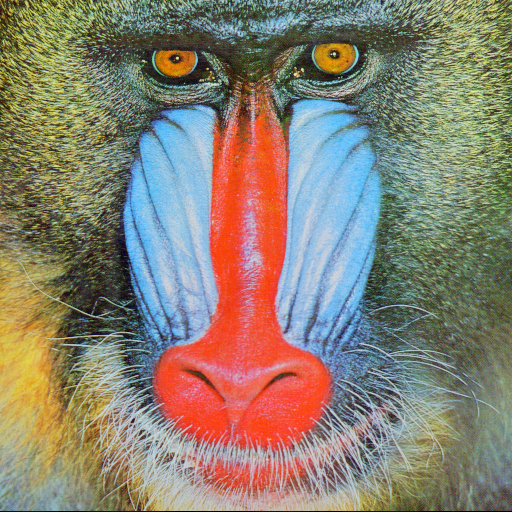

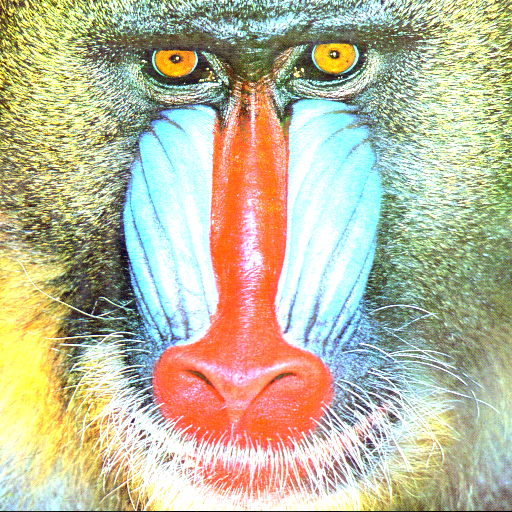

In [ ]:
from PIL import Image, ImageEnhance
im = Image.open("/content/baboon.png")
def  brightness (im):
    enhancer = ImageEnhance.Brightness(im)
    factor = 1 
    im_output = enhancer.enhance(factor)
    im_output.show()
    factor = 1.5
    im_output = enhancer.enhance(factor)
    im_output.show()
brightness (im)

# 8.WAFP to adjust the contrast of an image. You can use the PIL library to open and manipulate the image.

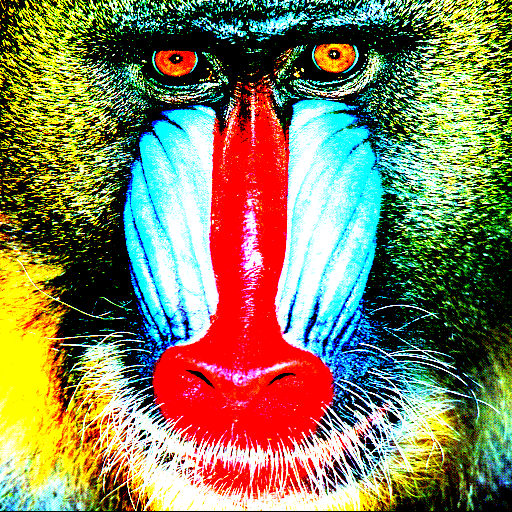

In [ ]:
from PIL import Image, ImageEnhance
img = Image.open(r"/content/baboon.png")
def contrast (img):
    im3 = ImageEnhance.Contrast(img)
    im3.enhance(5.0).show()
contrast (img)

## **9.WAFP to adjust the brightness and contrast of an image. You can use the PIL library to open and manipulate the image.**

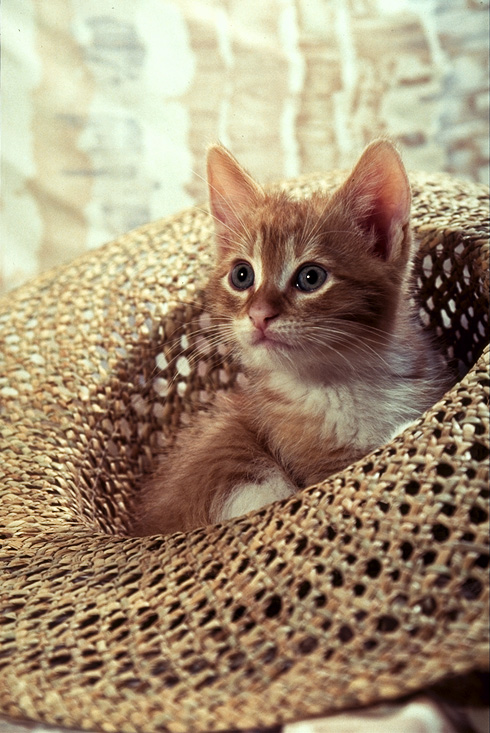

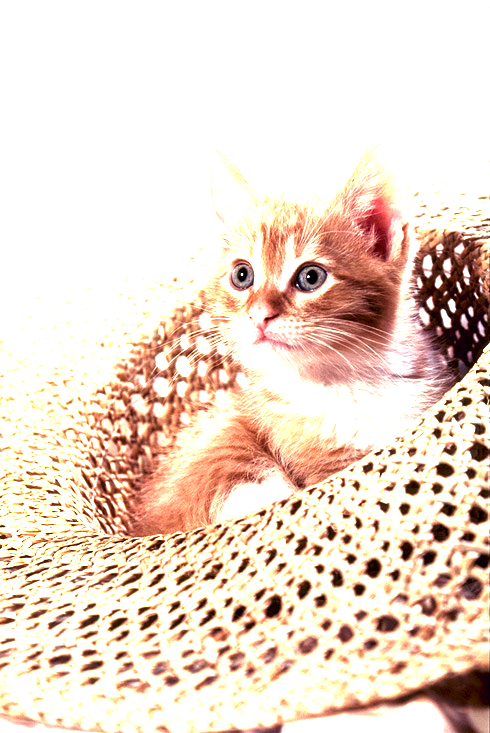

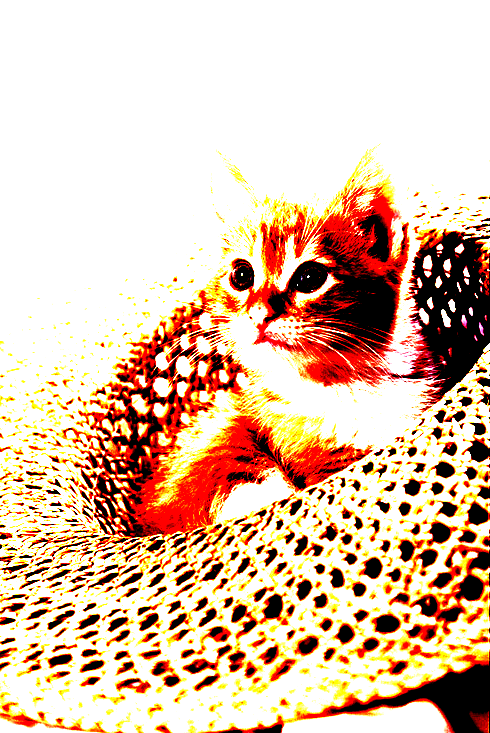

In [ ]:
from PIL import Image, ImageEnhance
im = Image.open("/content/cat.png")

def  brightness_and_contrast (im):
    enhancer = ImageEnhance.Brightness(im)
    factor = 1 #gives original image
    im_output = enhancer.enhance(factor)
    im_output.save('original-image.png')
    im_output.show()

    factor = 2.5 #brightens the image
    im_output = enhancer.enhance(factor)
    im_output.save('brightened-image.png')
    im_output.show()

    im3 = ImageEnhance.Contrast(im_output)
    im3.enhance(5.0).show()

brightness_and_contrast (im)

# 10. WAFP to perform histogram equalization on a grayscale image

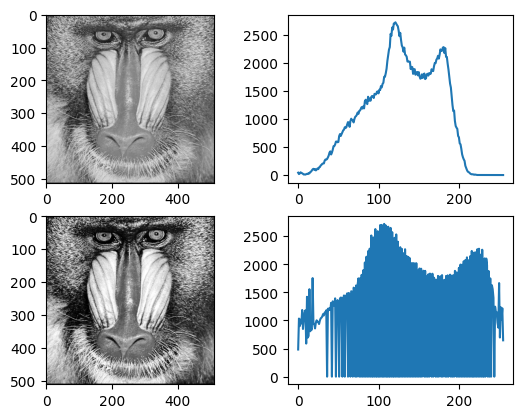

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/baboon.png',0)
def histogray (img):
    hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
    img_2 = cv2.equalizeHist(img)
    hist2 = cv2.calcHist([img_2],[0],None,[256],[0,256])
    plt.subplot(221),plt.imshow(img,cmap='gray');
    plt.subplot(222),plt.plot(hist1);
    plt.subplot(223),plt.imshow(img_2,cmap='gray');
    plt.subplot(224),plt.plot(hist2);
histogray (img)

## **11. WAFP to perform histogram equalization on a colour image.**

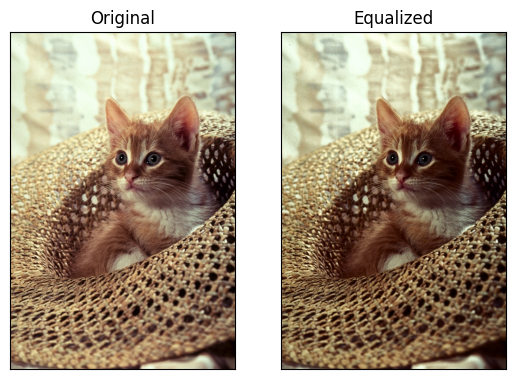

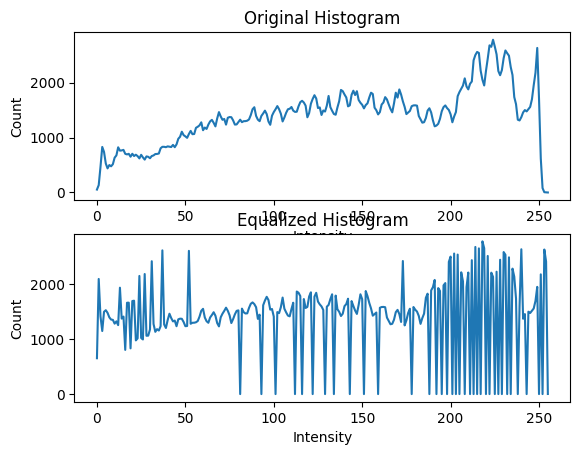

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('/content/cat.png')
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
equ_l = cv2.equalizeHist(l)
equ_lab = cv2.merge((equ_l, a, b))
equ_img = cv2.cvtColor(equ_lab, cv2.COLOR_LAB2BGR)
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(equ_img, cv2.COLOR_BGR2RGB)), plt.title('Equalized')
plt.xticks([]), plt.yticks([])
plt.show()
hist, bins = np.histogram(gray.flatten(), 256, [0, 256])

cdf = hist.cumsum()

cdf_normalized = cdf * hist.max() / cdf.max()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

equalized = cv2.LUT(gray, cdf)

hist_eq, bins_eq = np.histogram(equalized.flatten(), 256, [0, 256])

plt.subplot(2, 1, 1)
plt.plot(hist)
plt.title('Original Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.subplot(2, 1, 2)
plt.plot(hist_eq)
plt.title('Equalized Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.show()

# The program should provide various options for image manipulation, such as: Adjusting brightness and contrast Applying image filters (e.g., blur, sharpen, edge detection) Cropping and resizing the image Converting the image to grayscale or a different color space Performing histogram equalization Applying other image processing techniques of your choice 

In [ ]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog, messagebox

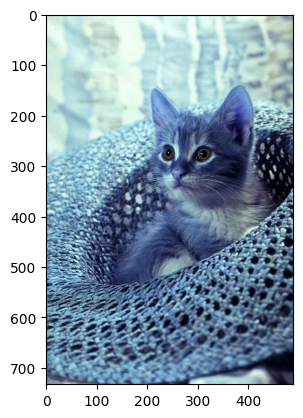

array([[[184, 201, 188],
        [216, 234, 221],
        [203, 226, 212],
        ...,
        [172, 191, 172],
        [175, 189, 177],
        [146, 156, 139]],

       [[181, 198, 185],
        [219, 237, 224],
        [202, 225, 211],
        ...,
        [167, 185, 168],
        [175, 189, 178],
        [138, 148, 132]],

       [[181, 198, 185],
        [215, 233, 220],
        [206, 229, 215],
        ...,
        [158, 176, 163],
        [167, 179, 173],
        [131, 140, 127]],

       ...,

       [[128, 145, 158],
        [125, 142, 155],
        [121, 138, 151],
        ...,
        [ 61,  68,  87],
        [ 75,  82, 101],
        [ 60,  59,  68]],

       [[122, 141, 156],
        [123, 142, 157],
        [117, 136, 151],
        ...,
        [ 65,  72,  91],
        [ 71,  78,  97],
        [ 59,  58,  67]],

       [[129, 148, 163],
        [132, 151, 166],
        [128, 147, 162],
        ...,
        [ 61,  68,  87],
        [ 71,  78,  97],
        [ 59,  58,  67]]

In [ ]:
img = cv2.imread('/content/cat.png')

def adjust_brightness_contrast(img, brightness, contrast):
    # Convert image to float32 for more accurate math
    img = np.float32(img) / 255.0
    # Adjust brightness and contrast using formula
    img = cv2.addWeighted(img, 1 + contrast / 127.0, img, 0, brightness - contrast)
    plt.imshow(img)
    plt.show()
    # Convert back to uint8 and return
    return np.uint8(img * 255.0)
adjust_brightness_contrast(img, .1, .1)

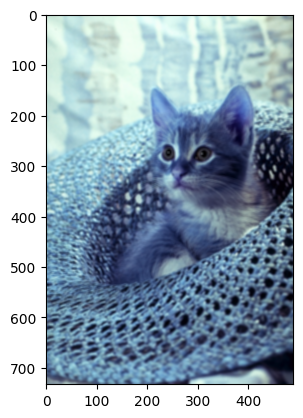

array([[[205, 224, 211],
        [203, 224, 210],
        [200, 222, 209],
        ...,
        [163, 178, 164],
        [163, 178, 165],
        [162, 176, 163]],

       [[205, 225, 211],
        [204, 224, 211],
        [200, 223, 209],
        ...,
        [162, 177, 163],
        [161, 176, 163],
        [160, 174, 162]],

       [[206, 226, 213],
        [205, 226, 212],
        [202, 225, 211],
        ...,
        [156, 171, 159],
        [157, 170, 160],
        [156, 169, 159]],

       ...,

       [[125, 142, 156],
        [125, 142, 155],
        [124, 142, 155],
        ...,
        [ 64,  70,  87],
        [ 66,  72,  89],
        [ 66,  72,  89]],

       [[124, 142, 156],
        [124, 142, 156],
        [124, 142, 155],
        ...,
        [ 64,  69,  86],
        [ 66,  71,  88],
        [ 66,  72,  89]],

       [[124, 142, 156],
        [124, 142, 156],
        [123, 142, 155],
        ...,
        [ 63,  68,  85],
        [ 66,  71,  88],
        [ 66,  71,  88]]

In [ ]:
def apply_filter(img, filter_type):
    if filter_type == 'blur':
        img = cv2.blur(img, (5, 5))
    elif filter_type == 'sharpen':
        kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel)
    elif filter_type == 'edge_detection':
        img = cv2.Canny(img, 100, 200)
    plt.imshow(img)
    plt.show()
    return img
apply_filter(img, "blur")

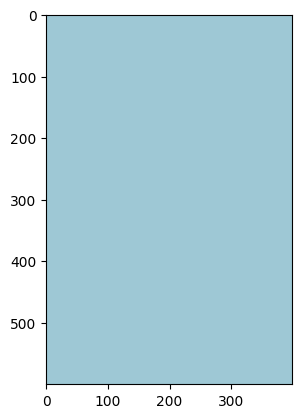

array([[[158, 200, 213],
        [158, 200, 213],
        [158, 200, 213],
        ...,
        [158, 200, 213],
        [158, 200, 213],
        [158, 200, 213]],

       [[158, 200, 213],
        [158, 200, 213],
        [158, 200, 213],
        ...,
        [158, 200, 213],
        [158, 200, 213],
        [158, 200, 213]],

       [[158, 200, 213],
        [158, 200, 213],
        [158, 200, 213],
        ...,
        [158, 200, 213],
        [158, 200, 213],
        [158, 200, 213]],

       ...,

       [[158, 200, 213],
        [158, 200, 213],
        [158, 200, 213],
        ...,
        [158, 200, 213],
        [158, 200, 213],
        [158, 200, 213]],

       [[158, 200, 213],
        [158, 200, 213],
        [158, 200, 213],
        ...,
        [158, 200, 213],
        [158, 200, 213],
        [158, 200, 213]],

       [[158, 200, 213],
        [158, 200, 213],
        [158, 200, 213],
        ...,
        [158, 200, 213],
        [158, 200, 213],
        [158, 200, 213]]

In [ ]:

# Define function to crop and resize the image
def crop_resize(img, x1, y1, x2, y2, width, height):
    # Crop the image using the specified coordinates
    img = img[y1:y2, x1:x2]
    # Resize the image to the specified dimensions
    img = cv2.resize(img, (width, height))
    plt.imshow(img)
    plt.show()
    return img
crop_resize(img, 201, 201, 202, 202, 400, 600)

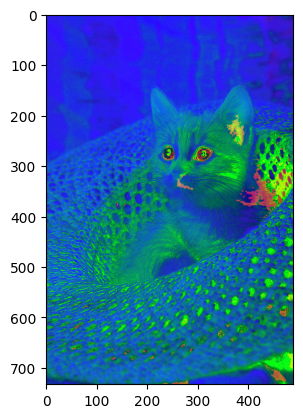

array([[[ 53,  22, 201],
        [ 52,  20, 234],
        [ 48,  26, 226],
        ...,
        [ 60,  25, 191],
        [ 56,  19, 189],
        [ 72,  28, 156]],

       [[ 53,  22, 198],
        [ 52,  19, 237],
        [ 48,  26, 225],
        ...,
        [ 58,  25, 185],
        [ 54,  19, 189],
        [ 71,  28, 148]],

       [[ 53,  22, 198],
        [ 52,  20, 233],
        [ 48,  26, 229],
        ...,
        [ 52,  26, 176],
        [ 45,  17, 179],
        [ 69,  24, 140]],

       ...,

       [[ 17,  48, 158],
        [ 17,  49, 155],
        [ 17,  51, 151],
        ...,
        [  8,  76,  87],
        [  8,  66, 101],
        [177,  34,  68]],

       [[ 17,  56, 156],
        [ 17,  55, 157],
        [ 17,  57, 151],
        ...,
        [  8,  73,  91],
        [  8,  68,  97],
        [177,  34,  67]],

       [[ 17,  53, 163],
        [ 17,  52, 166],
        [ 17,  54, 162],
        ...,
        [  8,  76,  87],
        [  8,  68,  97],
        [177,  34,  67]]

In [ ]:
# Define function to convert the image to grayscale or a different color space
def convert_color_space(img, color_space):
    if color_space == 'gray':
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif color_space == 'hsv':
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    plt.imshow(img)
    plt.show()
    return img
convert_color_space(img, 'hsv')

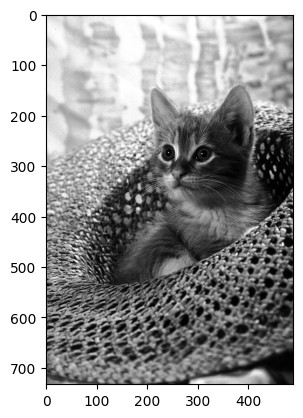

array([[177, 225, 209, ..., 165, 166, 128],
       [174, 230, 208, ..., 160, 166, 118],
       [174, 223, 214, ..., 151, 158, 110],
       ...,
       [124, 121, 116, ...,  46,  59,  35],
       [119, 121, 113, ...,  49,  55,  34],
       [128, 131, 127, ...,  46,  55,  34]], dtype=uint8)

In [ ]:
# Define function to perform histogram equalization
def perform_histogram_equalization(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    plt.imshow(img,cmap='gray')
    plt.show()
    return img
perform_histogram_equalization(img)